In [ ]:
 import torch
import torch.nn as nn
import torch.nn.functional as F

# **Pytorch Model Pipeline**

In [ ]:
x = torch.randn(5, requires_grad=True)
print (x)

y = x + 3
print(y)

z= y*y*2
z= z.mean()
print(z)

z.backward()
print(x.grad)

tensor([-1.7253, -0.8367,  2.4791, -1.0476, -0.3422], requires_grad=True)
tensor([1.2747, 2.1633, 5.4791, 1.9524, 2.6578], grad_fn=<AddBackward0>)
tensor(18.8805, grad_fn=<MeanBackward0>)
tensor([1.0198, 1.7307, 4.3833, 1.5619, 2.1263])


# **Neural Network**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

x_data = torch.tensor([[1],[2],[3],[4],[5],[6]], dtype=torch.float32)
y_data = torch.tensor([[3],[6],[9],[12],[15],[18]], dtype=torch.float32)
z = torch.tensor(0, dtype=torch.float32, requires_grad=True)

class NeuralNet(nn.Module):
  def __init__(self, input_size, hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    return out

model = NeuralNet(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


for epoch in range(500):
  y_pred = model(x_data)
  loss = criterion(y_pred, y_data)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  print(f'epoch {epoch+1}, loss: {loss.item():.4f}')

epoch 1, loss: 155.9527
epoch 2, loss: 150.8164
epoch 3, loss: 145.8836
epoch 4, loss: 141.1461
epoch 5, loss: 136.5962
epoch 6, loss: 132.2265
epoch 7, loss: 128.0298
epoch 8, loss: 123.9994
epoch 9, loss: 120.1285
epoch 10, loss: 116.4109
epoch 11, loss: 112.8405
epoch 12, loss: 109.4115
epoch 13, loss: 106.1183
epoch 14, loss: 102.9556
epoch 15, loss: 99.9180
epoch 16, loss: 97.0008
epoch 17, loss: 94.1990
epoch 18, loss: 91.5083
epoch 19, loss: 88.9240
epoch 20, loss: 86.4421
epoch 21, loss: 84.0585
epoch 22, loss: 81.7693
epoch 23, loss: 79.5707
epoch 24, loss: 77.4593
epoch 25, loss: 75.4314
epoch 26, loss: 73.4838
epoch 27, loss: 71.6133
epoch 28, loss: 69.8169
epoch 29, loss: 68.0917
epoch 30, loss: 66.4348
epoch 31, loss: 64.8434
epoch 32, loss: 63.3151
epoch 33, loss: 61.8474
epoch 34, loss: 60.4377
epoch 35, loss: 59.0839
epoch 36, loss: 57.7836
epoch 37, loss: 56.5349
epoch 38, loss: 55.3356
epoch 39, loss: 54.1838
epoch 40, loss: 53.0777
epoch 41, loss: 52.0153
epoch 42, l

In [ ]:
m = torch.tensor([3.5], dtype=torch.float32)
print(model(m).item())

10.499532699584961


# **Linear Regression**

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [ ]:
x_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)


In [ ]:
print(y_numpy)

[ 6.26872020e+01 -2.37639807e+01 -2.56867658e+01  7.93645654e+00
 -1.54754945e+01  3.60939588e+01 -4.07942011e+01 -1.08230392e+01
  2.14147070e+01  2.27986221e+01  3.72243519e+01  8.95671291e+01
  4.15511282e+01  1.50182931e+01 -6.18755179e+01  2.14036667e+01
 -8.91095732e+01  1.86789111e+01  1.42342255e+01 -1.26703865e+02
  1.28230663e+01  1.56947595e+00 -3.92917960e+01  1.89495791e+01
  8.41206595e+01  6.79742116e+01  3.03278631e+00  6.99430659e+00
 -4.27287124e+01 -7.42680785e+01  2.56654717e+01  4.33623631e+01
  6.37427951e-01 -2.12731725e+01 -4.93961082e+01 -1.62402661e+01
 -2.79165108e+01  7.14971057e-02  6.84660288e+01  1.56708970e+01
  3.04845974e+01 -3.47452883e+01  6.02517239e+01 -1.97578606e+01
 -5.47504290e+00  4.54439761e+00 -1.57871471e+01 -4.95365695e+01
  3.32660331e+01  8.90108319e+00  1.86401737e+00  1.44156261e+01
 -5.02194329e+01  1.16377367e+02  3.47094962e+01  3.52202177e+01
  2.61801170e+01  9.19841868e+00 -7.94234764e+00 -8.77552036e+01
  4.08053520e+01 -9.57175

In [ ]:
standard_scaler = StandardScaler()
x_numpy = standard_scaler.fit_transform(x_numpy)
y_numpy = standard_scaler.fit_transform(y_numpy.reshape(-1,1))
print("Standard Scaler:\n", x_numpy)
print("Standard Scaler:\n", y_numpy)

Standard Scaler:
 [[ 1.14553797]
 [ 0.21125517]
 [-1.05560794]
 [ 0.46268965]
 [-0.41536189]
 [ 0.83169721]
 [-0.39792468]
 [ 0.71535523]
 [ 0.79184373]
 [ 1.22549756]
 [ 1.02449364]
 [ 1.81701382]
 [ 0.93215805]
 [-0.12817983]
 [-0.77980796]
 [ 0.21647166]
 [-2.05377422]
 [ 0.68293814]
 [ 1.2558939 ]
 [-2.78425581]
 [ 0.66461921]
 [ 0.22235554]
 [-0.40048335]
 [ 1.12796634]
 [ 1.84645895]
 [ 1.73690481]
 [-0.54978229]
 [ 0.07527585]
 [-0.55096412]
 [-1.20887622]
 [ 0.51012709]
 [ 0.53069494]
 [ 0.40382388]
 [-0.47134358]
 [-0.8899548 ]
 [ 0.33278261]
 [-0.21597758]
 [ 0.51513303]
 [ 1.02520457]
 [-0.20788388]
 [ 0.51486697]
 [-0.63420233]
 [ 1.80040643]
 [-0.45862802]
 [-0.14420598]
 [-0.31900894]
 [-0.21829753]
 [-0.59900791]
 [ 0.47874046]
 [ 0.3460652 ]
 [-0.24768883]
 [ 0.12058214]
 [-0.14418781]
 [ 1.75045623]
 [-0.31123365]
 [ 0.49519344]
 [ 0.48152076]
 [-0.09053895]
 [-0.14468601]
 [-2.08464882]
 [ 0.4735755 ]
 [-0.13493537]
 [-1.10941845]
 [-0.66201402]
 [-1.50469687]
 [ 1.18

In [ ]:

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
print(x.shape)
print(y.shape)

n_samples, n_features = x.shape

torch.Size([100, 1])
torch.Size([100, 1])


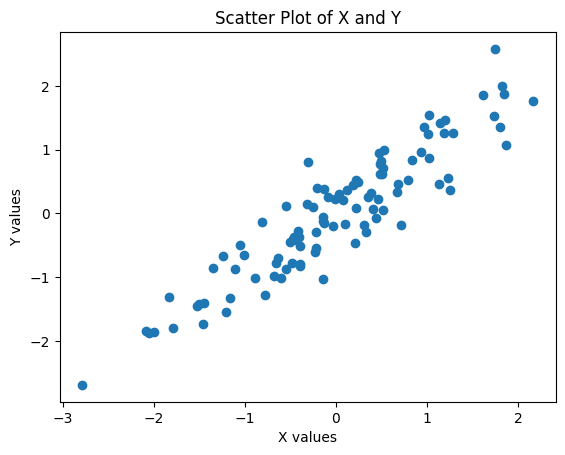

In [ ]:
plt.scatter(x_numpy, y_numpy)

# Add titles and labels
plt.title('Scatter Plot of X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')

# Show plot
plt.show()

In [ ]:
input_size = n_features
output_size = 1

model = LinearRegression(input_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
  y_pred = model(x)
  loss = criterion(y_pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    print(f'epoch {epoch+1}, loss: {loss.item():.4f}')


epoch 1, loss: 3.7730
epoch 11, loss: 2.5677
epoch 21, loss: 1.7630
epoch 31, loss: 1.2258
epoch 41, loss: 0.8672
epoch 51, loss: 0.6277
epoch 61, loss: 0.4679
epoch 71, loss: 0.3612
epoch 81, loss: 0.2899
epoch 91, loss: 0.2424
epoch 101, loss: 0.2106
epoch 111, loss: 0.1894
epoch 121, loss: 0.1753
epoch 131, loss: 0.1658
epoch 141, loss: 0.1595
epoch 151, loss: 0.1553
epoch 161, loss: 0.1525
epoch 171, loss: 0.1506
epoch 181, loss: 0.1494
epoch 191, loss: 0.1485
epoch 201, loss: 0.1480
epoch 211, loss: 0.1476
epoch 221, loss: 0.1473
epoch 231, loss: 0.1472
epoch 241, loss: 0.1471
epoch 251, loss: 0.1470
epoch 261, loss: 0.1469
epoch 271, loss: 0.1469
epoch 281, loss: 0.1469
epoch 291, loss: 0.1469
epoch 301, loss: 0.1469
epoch 311, loss: 0.1469
epoch 321, loss: 0.1469
epoch 331, loss: 0.1469
epoch 341, loss: 0.1468
epoch 351, loss: 0.1468
epoch 361, loss: 0.1468
epoch 371, loss: 0.1468
epoch 381, loss: 0.1468
epoch 391, loss: 0.1468
epoch 401, loss: 0.1468
epoch 411, loss: 0.1468
epo

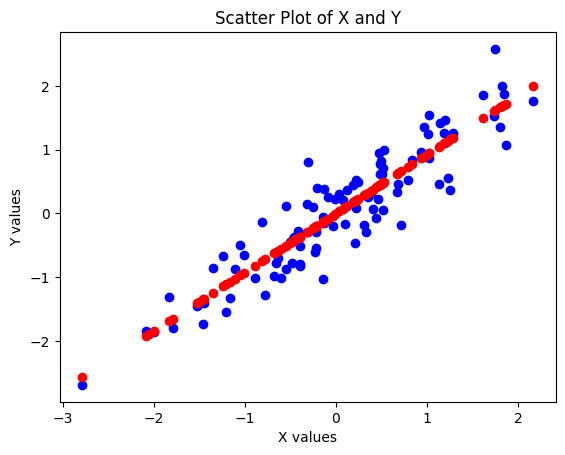

In [ ]:
predicted = model(x).detach().numpy()
# Add titles and labels
plt.scatter(x_numpy, y_numpy, color='blue')
plt.scatter(x_numpy, predicted, color = "red")
plt.title('Scatter Plot of X and Y')
plt.xlabel('X values')
plt.ylabel('Y values')

# Show plot
plt.show()

In [ ]:
m = len(y)
cost = (1 / (2 * m)) * np.sum((predicted - y_numpy) ** 2)
print(cost)

0.07342289585066501


In [ ]:
for i in range(len(y)):
  print(f'y: {y[i]}, predicted: {predicted[i]}')

y: tensor([1.4151]), predicted: [1.0580899]
y: tensor([-0.4598]), predicted: [0.19512837]
y: tensor([-0.5015]), predicted: [-0.97502494]
y: tensor([0.2277]), predicted: [0.42736885]
y: tensor([-0.2800]), predicted: [-0.383654]
y: tensor([0.8384]), predicted: [0.76820713]
y: tensor([-0.8291]), predicted: [-0.36754793]
y: tensor([-0.1791]), predicted: [0.66074646]
y: tensor([0.5200]), predicted: [0.73139596]
y: tensor([0.5501]), predicted: [1.1319456]
y: tensor([0.8629]), predicted: [0.9462859]
y: tensor([1.9981]), predicted: [1.6783067]
y: tensor([0.9567]), predicted: [0.860999]
y: tensor([0.3813]), predicted: [-0.11839484]
y: tensor([-1.2863]), predicted: [-0.72027904]
y: tensor([0.5198]), predicted: [0.19994664]
y: tensor([-1.8769]), predicted: [-1.8969932]
y: tensor([0.4607]), predicted: [0.630804]
y: tensor([0.3643]), predicted: [1.1600215]
y: tensor([-2.6922]), predicted: [-2.5717113]
y: tensor([0.3337]), predicted: [0.6138835]
y: tensor([0.0897]), predicted: [0.20538136]
y: tensor

# **Logistic Regression**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
bc = datasets.load_breast_cancer()
x, y = bc.data, bc.target
n_samples, n_features = x.shape
print(n_samples, n_features)

569 30


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


In [ ]:
standard_scaler = StandardScaler()
x_train = standard_scaler.fit_transform(x_train)
x_test = standard_scaler.transform(x_test)
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


In [ ]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))



In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    out = self.linear(x)
    y_pred = torch.sigmoid(out)
    return y_pred

model = LogisticRegression(n_features)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in range(1000):
  y_pred = model(x_train)
  loss = criterion(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 10 == 0:
    print(f'epoch {epoch}, loss: {loss.item():.4f}')

epoch 0, loss: 0.5906
epoch 10, loss: 0.4901
epoch 20, loss: 0.4250
epoch 30, loss: 0.3797
epoch 40, loss: 0.3463
epoch 50, loss: 0.3206
epoch 60, loss: 0.3001
epoch 70, loss: 0.2833
epoch 80, loss: 0.2692
epoch 90, loss: 0.2573
epoch 100, loss: 0.2469
epoch 110, loss: 0.2379
epoch 120, loss: 0.2299
epoch 130, loss: 0.2228
epoch 140, loss: 0.2164
epoch 150, loss: 0.2106
epoch 160, loss: 0.2053
epoch 170, loss: 0.2005
epoch 180, loss: 0.1961
epoch 190, loss: 0.1920
epoch 200, loss: 0.1882
epoch 210, loss: 0.1847
epoch 220, loss: 0.1814
epoch 230, loss: 0.1783
epoch 240, loss: 0.1754
epoch 250, loss: 0.1727
epoch 260, loss: 0.1701
epoch 270, loss: 0.1677
epoch 280, loss: 0.1654
epoch 290, loss: 0.1633
epoch 300, loss: 0.1612
epoch 310, loss: 0.1593
epoch 320, loss: 0.1574
epoch 330, loss: 0.1556
epoch 340, loss: 0.1539
epoch 350, loss: 0.1523
epoch 360, loss: 0.1507
epoch 370, loss: 0.1492
epoch 380, loss: 0.1478
epoch 390, loss: 0.1464
epoch 400, loss: 0.1451
epoch 410, loss: 0.1438
epo

In [ ]:
with torch.no_grad():
  y_pred = model(x_test)
  y_pred_cls = y_pred.round()
  acc = y_pred_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy: {acc.item():.4f}')

accuracy: 0.9912


# **Torch Dataset and Dataloader and Batch Size**

epoch = 1 forward and backward pass of ALL training examples

batch_size = number of training samples in one forward and backward pass

number of iterations = number of passes, each pass using [batch_size] numbe of samples

eg.  100 samples, batch_size=20 --> 100/20 =5 iterations for 1 each

In [ ]:
import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math

class WineDataset(Dataset):
  def __init__(self):
    xy = np.loadtxt('wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:, 1:])
    self.y = torch.from_numpy(xy[:, [0]])
    self.n_samples = xy.shape[0]


  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(features, labels)

tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])


In [ ]:
dataloader = DataLoader(dataset=dataset,
                        batch_size=4,
                        shuffle=True,
                        num_workers=2)

num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)


178 45


In [ ]:
for epoch in range(num_epochs):
  for i, (inputs, labels) in enumerate(dataloader):
    if (i+1) % 5 == 0:
      print(f"epoch {epoch+1}/{num_epochs}, step {i+1}/{n_iterations}, inputs {inputs.shape}")

epoch 1/2, step 5/45, inputs torch.Size([4, 13])
epoch 1/2, step 10/45, inputs torch.Size([4, 13])
epoch 1/2, step 15/45, inputs torch.Size([4, 13])
epoch 1/2, step 20/45, inputs torch.Size([4, 13])
epoch 1/2, step 25/45, inputs torch.Size([4, 13])
epoch 1/2, step 30/45, inputs torch.Size([4, 13])
epoch 1/2, step 35/45, inputs torch.Size([4, 13])
epoch 1/2, step 40/45, inputs torch.Size([4, 13])
epoch 1/2, step 45/45, inputs torch.Size([2, 13])
epoch 2/2, step 5/45, inputs torch.Size([4, 13])
epoch 2/2, step 10/45, inputs torch.Size([4, 13])
epoch 2/2, step 15/45, inputs torch.Size([4, 13])
epoch 2/2, step 20/45, inputs torch.Size([4, 13])
epoch 2/2, step 25/45, inputs torch.Size([4, 13])
epoch 2/2, step 30/45, inputs torch.Size([4, 13])
epoch 2/2, step 35/45, inputs torch.Size([4, 13])
epoch 2/2, step 40/45, inputs torch.Size([4, 13])
epoch 2/2, step 45/45, inputs torch.Size([2, 13])


# **Transfer Learning**

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler
import time
import os
import copy
import torchvision.models as models